### Bibliotecas usadas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans

import statsmodels.formula.api as sfm #Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas.
from pandas.plotting import scatter_matrix #Herramienta de Pandas para diagramas de dispersión en matriz.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Leitura e visualização do dataset

#### Dataset com as cinco variávels meteorológicas

In [ ]:
df_tsc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BD_MO629_F.csv')
df_tsc.shape

(145, 10)

In [ ]:
df_tsc.head()

,created_at,Ultrasom cm,Volume cm3,Variacao de V cm3,Vento 5m (m/s),Vento 2m (m/s),Direção 2m (º),Umidade relativa (%),Temperatura (ºC),Chuva 10min (mm)
0,2022-11-22T00:04:14+00:00,30.0,0,0,5.069,2.932,155.70,57.23,22.06,0.0
1,2022-11-22T00:14:16+00:00,30.0,0,0,4.434,2.405,99.90,58.40,21.84,0.0
2,2022-11-22T00:24:18+00:00,30.0,0,0,4.712,2.546,32.88,59.48,21.65,0.0
3,2022-11-22T00:34:19+00:00,30.0,0,0,4.260,2.261,133.10,60.80,21.43,0.0
4,2022-11-22T00:44:21+00:00,30.0,0,0,4.851,2.607,14.02,61.66,21.28,0.0


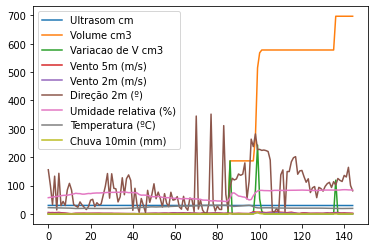

In [ ]:
df_tsc.plot()

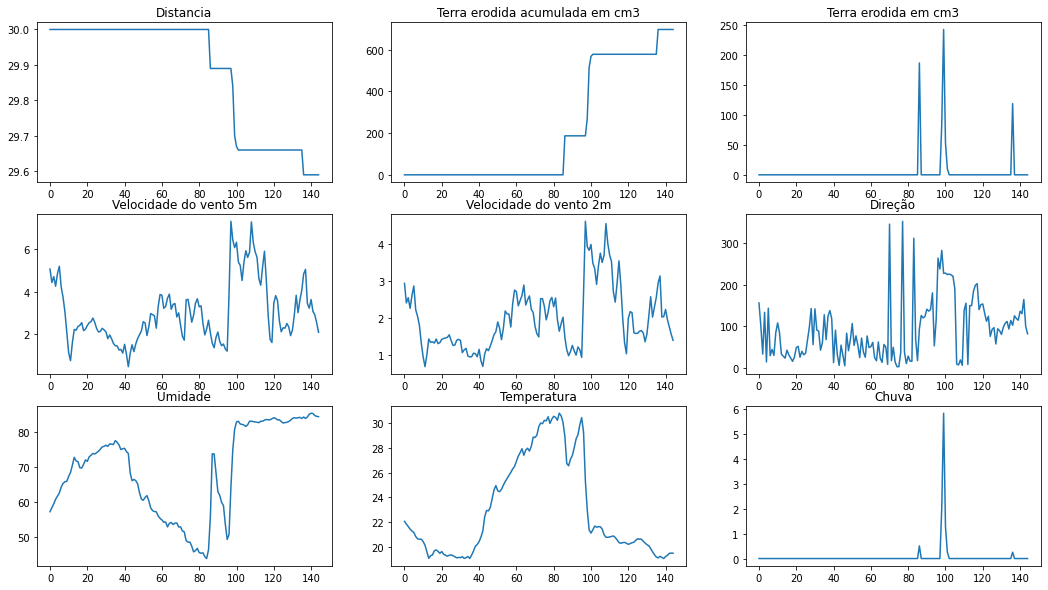

In [ ]:
plt.figure(figsize=(18,10))

plt.subplot(331)
plt.plot(df_tsc['Ultrasom cm'])
plt.title('Distancia')

plt.subplot(332)
plt.plot(df_tsc['Volume cm3'])
plt.title('Terra erodida acumulada em cm3')

plt.subplot(333)
plt.plot(df_tsc['Variacao de V cm3'])
plt.title('Terra erodida em cm3')

plt.subplot(334)
plt.plot(df_tsc['Vento 5m (m/s)'])
plt.title('Velocidade do vento 5m')

plt.subplot(335)
plt.plot(df_tsc['Vento 2m (m/s)'])
plt.title('Velocidade do vento 2m')

plt.subplot(336)
plt.plot(df_tsc['Direção 2m (º)'])
plt.title('Direção')

plt.subplot(337)
plt.plot(df_tsc['Umidade relativa (%)'])
plt.title('Umidade')

plt.subplot(338)
plt.plot(df_tsc['Temperatura (ºC)'])
plt.title('Temperatura')

plt.subplot(339)
plt.plot(df_tsc['Chuva 10min (mm)'])
plt.title('Chuva')

plt.show()

### Seleção de variables

In [ ]:
df_2 = df_tsc.iloc[:,[3,4,5,6,7,8,9]] # Dataframe com variaveis ambientais.
df_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Variacao de V cm3,145.0,4.806897,28.255112,0.000,0.000,0.000,0.000,243.000
Vento 5m (m/s),145.0,3.029352,1.443628,0.473,2.059,2.594,3.734,7.316
Vento 2m (m/s),145.0,1.990359,0.849301,0.684,1.340,1.799,2.518,4.609
Direção 2m (º),145.0,91.154634,72.259448,2.638,31.310,80.300,130.200,351.900
Umidade relativa (%),145.0,69.233172,12.833334,43.850,58.320,72.040,82.800,85.400
Temperatura (ºC),145.0,22.988138,3.945236,19.050,19.680,20.880,26.570,30.830
Chuva 10min (mm),145.0,0.070069,0.524047,0.000,0.000,0.000,0.000,5.842


#### Plot de diagrama de dispersão

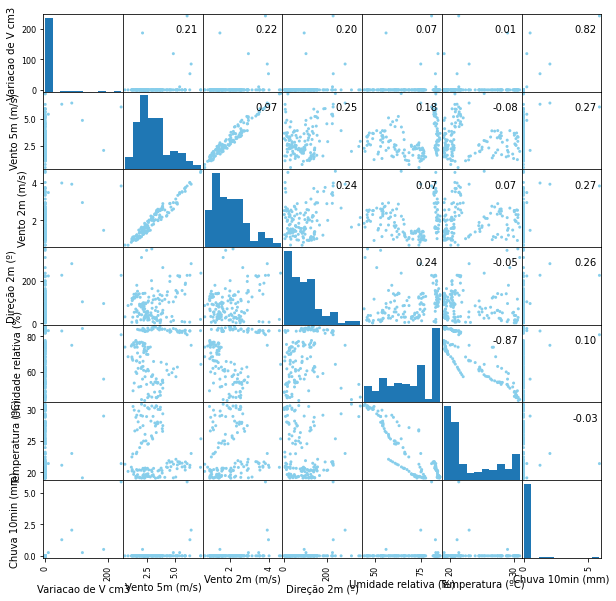

In [ ]:
axes = scatter_matrix(df_2, alpha=1, figsize=(10,10), color="skyblue")
corr = df_2.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [ ]:
data = df_2
data.rename(columns={'Variacao de V cm3':'Volume',
                          'Vento 5m (m/s)':'Vv5',
                          'Vento 2m (m/s)':'Vv2',
                          'Direção 2m (º)':'DV2',
                          'Umidade relativa (%)':'HR',
                          'Temperatura (ºC)':'T',
                          'Chuva 10min (mm)':'Rain'}, 
                 inplace=True)
data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Volume,Vv5,Vv2,DV2,HR,T,Rain
0,0,5.069,2.932,155.70,57.23,22.06,0.0
1,0,4.434,2.405,99.90,58.40,21.84,0.0
2,0,4.712,2.546,32.88,59.48,21.65,0.0
3,0,4.260,2.261,133.10,60.80,21.43,0.0
4,0,4.851,2.607,14.02,61.66,21.28,0.0


In [ ]:
lm = sfm.ols(formula="Volume~Vv5+Vv2+DV2+HR+T+Rain", data=data).fit() #NOX = regresando, NO+NO2 = regresores
#ols = Ordinary Least Squares o "mínimos cuadrados ordinarios"
lm.params #parametros de la ecuación

Intercept   -43.865749
Vv5           5.876133
Vv2         -10.549400
DV2          -0.010707
HR            0.269354
T             1.352469
Rain         44.325617
dtype: float64

In [ ]:
f=5.405
e=3.478
d=224
c=83.1
b=21.38
a=0.254
erosion = a*44.325617 +b*1.352469 + c*0.269354 -d*0.010707 -e*10.5494 +f*5.876133 -43.865749

erosion

11.363380002999996

In [ ]:
lm.pvalues #nivel de significancia, se entiende que bajo 0.05 el p-value, se aprueba la hipotesis

Intercept    2.146819e-01
Vv5          3.046385e-01
Vv2          2.831837e-01
DV2          6.229664e-01
HR           2.839667e-01
T            1.442261e-01
Rain         8.645316e-33
dtype: float64

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     46.79
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           6.20e-31
Time:                        14:51:41   Log-Likelihood:                -609.26
No. Observations:                 145   AIC:                             1233.
Df Residuals:                     138   BIC:                             1253.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.8657     35.190     -1.247      0.215    -113.448      25.716
Vv5            5.8761      5.703      1.030      0.305      -5.400      17.153
Vv2          -10.5494      9.792     -1.077      0.283     -29.910       8.812
DV2           -0.0107      0.022     -0.493      0.623      -0.054       0.032
HR             0.2694      0.250      1.076      0.284      -0.226       0.764
T              1.3525      0.921      1.469      0.144      -0.469       3.173
Rain          44.3256      2.803     15.816      0.000      38.784      49.867
==============================================================================
Omnibus:                      260.679   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34896.350
Skew:                           8.489   Prob(JB):                         0.00
Kurtosis:                      77.079   Cond. No.                     3.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Aplicação do modelo com as 5 variáveis

In [ ]:
score_x = []
for i in range(2,31):
  m = Clustering(n_clusters=i)
  m.fit(X)
  score_x.append(m.cluster.inertia_)

Text(0.5, 1.0, 'Elbow curve')

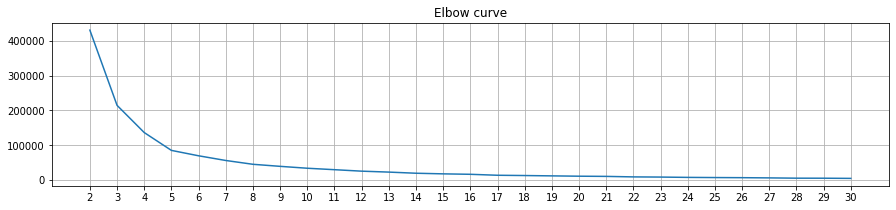

In [ ]:
fig = plt.figure(figsize=(15, 3))
plt.plot(np.arange(2,31), score_x)
plt.xticks(np.arange(2,31))
plt.grid(True)
plt.title('Elbow curve')

In [ ]:
cl = Clustering(n_clusters=9)
cl.fit(X)
pred_5v = cl.predict(X)

In [ ]:
cl.cluster.cluster_centers_

array([[ 2.07647059e+01,  7.17882353e+01,  1.01417647e+03,
         1.54681412e+01,  2.99598000e+01],
       [ 2.20000000e+01,  5.66000000e+01,  1.01480000e+03,
         3.29616000e+01,  1.10345455e-01],
       [ 1.66416382e+01,  7.48600683e+01,  1.01640956e+03,
         2.86552628e+01,  5.43071672e-02],
       [ 1.63818182e+01,  7.44727273e+01,  1.01727273e+03,
         2.61340364e+01, -4.70608000e+01],
       [ 2.74661017e+01,  4.09576271e+01,  1.01442373e+03,
         1.52081695e+01,  2.99197119e+01],
       [ 2.64112903e+01,  4.26693548e+01,  1.01591935e+03,
         1.67539355e+01,  1.89741935e-01],
       [ 1.68292683e+01,  8.19756098e+01,  1.01565041e+03,
         1.81448780e+01,  4.90650407e-02],
       [ 1.93035714e+01,  6.81964286e+01,  1.01732143e+03,
         1.77351429e+01,  1.39642857e-01],
       [ 2.30000000e+01,  7.30000000e+01,  1.01200000e+03,
         5.00040000e+01,  2.97126000e+01]])

In [ ]:
cl.cluster.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 2, 2, 2, 2,
       2, 2, 6, 6, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6,
       6, 6, 2, 2, 2, 2, 6, 6, 6, 6, 2, 2, 2, 2, 6, 6, 6, 6, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

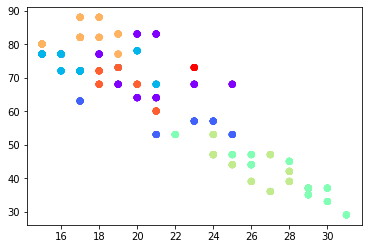

In [ ]:
plt.scatter(X[:,0], X[:,1], c=pred_5v, cmap='rainbow')
plt.show()

#### Aplicação do modelo apenas com a variável distância

In [ ]:
score_x_dist = []
for i in range(2,31):
  m = Clustering(n_clusters=i)
  m.fit(X_dist)
  score_x_dist.append(m.cluster.inertia_)

Text(0.5, 1.0, 'Elbow curve')

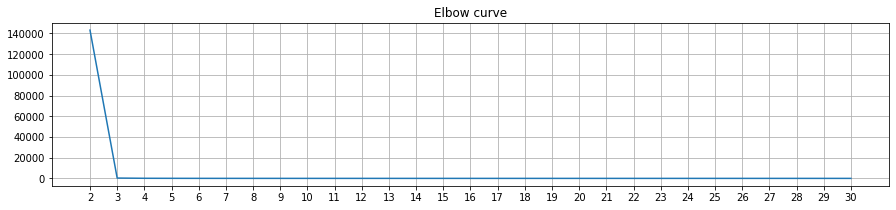

In [ ]:
fig2 = plt.figure(figsize=(15, 3))
plt.plot(np.arange(2,31), score_x_dist)
plt.xticks(np.arange(2,31))
plt.grid(True)
plt.title('Elbow curve')

In [ ]:
cl_dist = Clustering(n_clusters=3)
cl_dist.fit(X_dist)
pred_dist = cl_dist.predict(X_dist)

In [ ]:
cl_dist.cluster.cluster_centers_

array([[  0.06826154],
       [ 29.85621028],
       [-47.0608    ]])

In [ ]:
cl_dist.cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

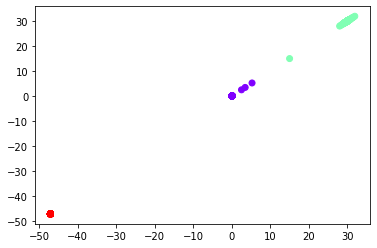

In [ ]:
plt.scatter(X_dist, X_dist, c=pred_dist, cmap='rainbow')
plt.show()